## **Malay language Word2Vec by Fung Chey **

---
Project for CDS522


### **SECTION A: CORPUS PREPARATION**

**Step 1: Install Gensim package**

In [1]:
!pip install gensim

 **Step 2: Download Wikipedia (Malay) dump file from https://dumps.wikimedia.org/mswiki/20181201/
and upload to Google cloud**

> File size 200 Mb



In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/cds522/mswiki.xml.bz2" "mswiki.xml.bz2"


**Step 3: Convert Wiki dump file from XML to text corpus**

In [0]:
import sys
from gensim.corpora import WikiCorpus

def make_corpus(in_f, out_f):

	"""Convert Wikipedia xml dump file to text corpus"""

	output = open(out_f, 'w')
	wiki = WikiCorpus(in_f)

	i = 0
	for text in wiki.get_texts():
		output.write(bytes(' '.join(text), 'utf-8').decode('utf-8') + '\n')
		i = i + 1
		if (i % 10000 == 0):
			print('Processed ' + str(i) + ' articles')
	output.close()
	print('Processing complete!')




In [7]:
	make_corpus("mswiki.xml.bz2", "processed_mswiki")

Processed 10000 articles
Processed 20000 articles
Processed 30000 articles
Processed 40000 articles
Processed 50000 articles
Processed 60000 articles
Processed 70000 articles
Processed 80000 articles
Processed 90000 articles
Processed 100000 articles
Processed 110000 articles
Processing complete!


**Step 4: Check the corpus**


In [0]:
import sys, time
def check_corpus(input_file):
    
    """Reads some lines of corpus from text file"""

    while(1):
        for lines in range(50):
            print(input_file.readline())
        break

In [0]:
def load_corpus(input_file):

    """Loads corpus from text file"""

    print('Loading corpus...')
    time1 = time.time()
    corpus = input_file.read()
    time2 = time.time()
    total_time = time2-time1
    print('It took %0.3f seconds to load corpus' %total_time)
    return corpus

In [10]:
corpus_file = open("processed_mswiki",'r')
check_corpus(corpus_file)
corpus = load_corpus(corpus_file)


bahasa melayu tulisan jawi بهاس ملايو ialah sejenis bahasa melayu polinesia di bawah keluarga bahasa austronesia yang telah digunakan di wilayah malaysia indonesia dan persekitarannya sejak melebihi tahun lalu walaupun asal usul bangsa melayu dalam pengertian yang khusus yang paling asal belum diketahui secara pasti tetapi pertumbuhan bahasa melayu dapatlah dikatakan berasal dari sumatera selatan di sekitar jambi dan palembang rekod terawal bahasa melayu kuno ialah sebuah batu bersurat bertarikh masihi yang dijumpai di sumatera selatan bahasa melayu ialah bahasa kebangsaan malaysia indonesia brunei dan singapura di indonesia bahasa melayu kini dipanggil bahasa indonesia dan walaupun kerajaan malaysia berhasrat menamakan bahasa kebangsaan sebagai bahasa malaysia namun ianya bertentangan dengan nama bahasa kebangsaan yang termaktub dalam perlembagaan persekutuan malaysia selain daripada keempat empat negara tersebut bahasa melayu juga ditutur oleh penduduk penduduk melayu di selatan thai

### **SECTION B: Word2Vec MODEL TRAINING** 

**Step 5: Call gensim package**

In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')# ignore warning

import logging
import os.path
import sys
import multiprocessing

from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence


**Step 6: Limit the training function to 5 epoch and save the model **

In [0]:
def train_model():
    logger = logging.getLogger("mylog")

    logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s',level=logging.INFO)
    logger.info("running %s" % ' '.join(sys.argv))

    
    inp = "processed_mswiki"
    outp1 = "mswiki.model"
    outp2 = "mswiki.vector"

    # train skip-gram model
    model = Word2Vec(LineSentence(inp), size=400, window=5, min_count=5,
                     workers=multiprocessing.cpu_count())

    # save model
    model.save(outp1)
    model.wv.save_word2vec_format(outp2, binary=False)

**Step 7: Takes 10 minutes to train the 177 million raw words **

In [13]:
train_model()

2019-01-14 07:02:55,298: INFO: running /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-80ec584f-e10b-47ba-804d-8a4b1b48628e.json
2019-01-14 07:02:55,301: INFO: collecting all words and their counts
2019-01-14 07:02:55,305: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-01-14 07:02:57,079: INFO: PROGRESS: at sentence #10000, processed 5482021 words, keeping 180228 word types
2019-01-14 07:02:58,661: INFO: PROGRESS: at sentence #20000, processed 10223482 words, keeping 289464 word types
2019-01-14 07:02:59,903: INFO: PROGRESS: at sentence #30000, processed 13747671 words, keeping 375837 word types
2019-01-14 07:03:00,852: INFO: PROGRESS: at sentence #40000, processed 16585022 words, keeping 425131 word types
2019-01-14 07:03:01,523: INFO: PROGRESS: at sentence #50000, processed 18604194 words, keeping 455017 word types
2019-01-14 07:03:02,313: INFO: PROGRESS: at sentence #60000, processed 20919352 wor

### **SECTION C: TEST THE TRAINED MODEL** 

**Step 8: Load the trained model**

In [14]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')# ignore error
import gensim
model = gensim.models.Word2Vec.load ("mswiki.model")

2019-01-14 07:12:50,886: INFO: loading Word2Vec object from mswiki.model
2019-01-14 07:12:51,395: INFO: loading wv recursively from mswiki.model.wv.* with mmap=None
2019-01-14 07:12:51,396: INFO: loading vectors from mswiki.model.wv.vectors.npy with mmap=None
2019-01-14 07:12:51,483: INFO: setting ignored attribute vectors_norm to None
2019-01-14 07:12:51,484: INFO: loading vocabulary recursively from mswiki.model.vocabulary.* with mmap=None
2019-01-14 07:12:51,485: INFO: loading trainables recursively from mswiki.model.trainables.* with mmap=None
2019-01-14 07:12:51,486: INFO: loading syn1neg from mswiki.model.trainables.syn1neg.npy with mmap=None
2019-01-14 07:12:51,573: INFO: setting ignored attribute cum_table to None
2019-01-14 07:12:51,574: INFO: loaded mswiki.model


**Step 9: Define functions**

1.   Search most similar words compared to the input text
2.   Test the similarity between two input text
3.   Find the most NOT similar word from four input text



In [0]:
def test_most_similar (input_text):
   word = model.most_similar(input_text)
   for t in word:
        print (t[0],t[1])
  
def test_similarity (input_text1, input_text2):
   print (model.similarity (input_text1, input_text2))
    
def test_doesnt_match (input_text1, input_text2, input_text3, input_text4):
    list4 = [input_text1, input_text2, input_text3, input_text4]
    print (model.doesnt_match(list4))

**Step 10: Search most similar words compared to the input text**


1.   demam => batuk (76%)
2.   langkawi => tioman (61%)



In [16]:
test_most_similar("demam")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
2019-01-14 07:12:52,240: INFO: precomputing L2-norms of word weight vectors


batuk 0.7627063393592834
cirit 0.740906834602356
birit 0.726283609867096
muntah 0.7182497382164001
denggi 0.7177006006240845
akut 0.7158676385879517
jangkitan 0.7134271860122681
bengkak 0.7106750011444092
radang 0.7073150277137756
simptom 0.7039797306060791


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [17]:
test_most_similar("langkawi")

tioman 0.6159933805465698
jerlun 0.5524656772613525
pangkor 0.5479121208190918
awana 0.5415344834327698
jitra 0.54047691822052
labuan 0.5131414532661438
kukup 0.507798969745636
jemor 0.5044652819633484
sebang 0.5034794211387634
kulim 0.5033469200134277


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Step 11: Test the similarity between two input text**


1.   kedah vs perlis = (68%)
2.   kedah vs sarawak = (37%)

In [18]:
test_similarity ("kedah","perlis")

0.67919904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [19]:
test_similarity ("kedah","sarawak")

0.38232526


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Step 12: Find the most NOT similar word from four input text**






*   kereta (car, vehicle)
*   basikal (bicycle, vehicle)
*   motor (motorcycle, vehicle)
*   *ayam (chicken, animal)*



In [20]:
test_doesnt_match ("kereta","basikal","motor","ayam")

ayam


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Step 13: Reduce dimension to 3D and visualize**


*   call sklearn for PCA dimension reduction
*   call matplotlib for graph plotting



In [0]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


**Step 14: Define plotting function of outliers**


*   Reused function test_doesnt_match
*   Plot X,Y,Z
*   Annotate the text next to the point



In [0]:
def plot_doesnt_match (input_text1, input_text2, input_text3, input_text4):
      input_list = [input_text1, input_text2, input_text3, input_text4]

      #Reduce dimension to 3D
      X = model[model.wv.vocab]
      pca = PCA(n_components=3)
      pca_result = pca.fit_transform(X)

      x = pca_result[:,0]
      y = pca_result[:,1] 
      z = pca_result[:,2]
      
      # create a scatter plot of the projection
      words = list(input_list)
      fig = pyplot.figure()
      ax = fig.add_subplot(111, projection='3d')
      for i, word in enumerate(words):
        ax.scatter(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2])
        ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2],word)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


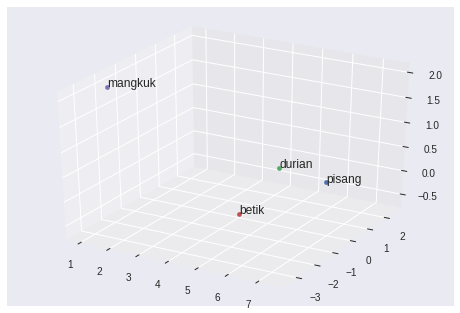

In [63]:
plot_doesnt_match ("pisang","durian","betik","mangkuk")